# Linear regression  with Tensorflow

###### Our company needs to have a clearer idea about how the adverstising investment is having effect on the company benefits.. We have all the records since 1986 and as a first point we need to find the linear regression for this.


To achieve this, we will make use of **tensorflow**, an open source library for numeric computation using data flow graphs

----------------

First af all, we need to import the required libraries:

**pandas**: This is used to load data from a csv file.

**numpy**: It will help us to manipulate arrays

**matplotlib.pyplot**: It display the graph

**tensorflow**: the deep learning tool.

In [975]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Now we define the constant values such as the csv file path and the columns name.

In [1051]:
DATA_PATH = 'data/company_investment.train'
COLUMNS = ["Year", "Advertising_expenses", "Turnover"]

To implement our linear regression we need some constants values that will be used by **tensorflow**

**learning_rate**: 

**training_epochs**:  It is a measure of the number of times all of the training vectors are used once to update the weights.

**display_step**: This one is used to print the info every epoches. 

In [1049]:
learning_rate = 0.03
training_epochs = 20
display_step = 100

Loading the csv file by pandas (More infor abbout reading a csv file can be found on [http://pandas.pydata.org/pandas-docs/stable/tutorials.html](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

In [1053]:
data = pd.read_csv(tf.gfile.Open(DATA_PATH),
        names=COLUMNS,
        sep=',',
        header=0,
        engine="python")

Once we have loaded the csv into a variable we need to find the two arrays that will contain the values for X and Y axis. As we can see below we take the values from the column "Advertising_expenses" to set the X acis and the values from column "Turnover" for the Y axis. We also format the values in these arrays as float

In [1036]:
train_X= np.asarray([i[1] for i in data.loc[:,['Advertising_expenses']].to_records()],dtype="float")
train_Y= np.asarray([i[1] for i in data.loc[:,['Turnover']].to_records()],dtype="float")

We need to find the number of elements in X axis.

In [1037]:
n_samples = train_X.shape[0]

We describe the format for each axis in the graph

In [1038]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Initially wegot some random values for weight and bias.

In [1039]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Construct a linear model

In [1040]:
pred = tf.add(tf.mul(X, W), b)

Mean squared error

In [1045]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Tensorflow provide us with some other optimize. The **GradientDescentOptimizer** takes in two values, the function to optimize/find the minimum of and the learning rate associated with it

In [1054]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

It's almost done!! initialize_all_variables just initialize all the variables for the graph

In [1047]:
init = tf.initialize_all_variables()

Epoch: 0100 cost= 0.009324249 W= 0.990019 b= 0.387212
Epoch: 0200 cost= 0.007770765 W= 0.990888 b= 0.353489
Epoch: 0300 cost= 0.006476148 W= 0.991682 b= 0.322703
Epoch: 0400 cost= 0.005397482 W= 0.992406 b= 0.294599
Epoch: 0500 cost= 0.004497977 W= 0.993067 b= 0.268941
Epoch: 0600 cost= 0.003748588 W= 0.993671 b= 0.245517
Epoch: 0700 cost= 0.003124078 W= 0.994222 b= 0.224135
Epoch: 0800 cost= 0.002603763 W= 0.994726 b= 0.204614
Epoch: 0900 cost= 0.002169796 W= 0.995185 b= 0.186793
Epoch: 1000 cost= 0.001808339 W= 0.995604 b= 0.170524
Epoch: 1100 cost= 0.001507211 W= 0.995987 b= 0.155673
Epoch: 1200 cost= 0.001256007 W= 0.996337 b= 0.142115
Epoch: 1300 cost= 0.001046823 W= 0.996656 b= 0.129738
Epoch: 1400 cost= 0.000872332 W= 0.996947 b= 0.118439
Epoch: 1500 cost= 0.000727042 W= 0.997213 b= 0.108124
Epoch: 1600 cost= 0.000605863 W= 0.997456 b= 0.0987069
Epoch: 1700 cost= 0.000504966 W= 0.997677 b= 0.09011
Epoch: 1800 cost= 0.000420858 W= 0.99788 b= 0.0822618
Epoch: 1900 cost= 0.00035071

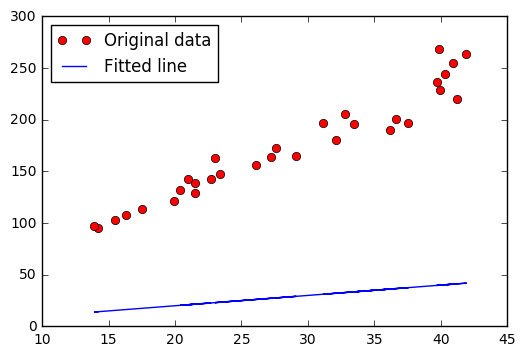

In [1048]:
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(loc='upper left')
    plt.show()